In [145]:
import scipy.optimize
import numpy as np

#example 2d data.
y = np.zeros([10,10])
for x0 in range(10):
    for x1 in range(10):
        y[x0,x1] = 5*np.exp(-(((x0-5)**2 +(x1-5.3)**2))/4)
y+=np.random.randn(10,10)*0.4
y[y<0]=0

In [146]:
np.sum(y)

72.36279776322974

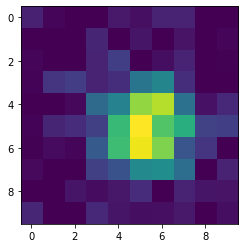

In [147]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(y)

In [148]:
xv, yv = np.meshgrid(np.linspace(0, 9, 10), np.linspace(0, 9, 10))
xv.shape #,sparse=True)

(10, 10)

In [149]:
x = np.c_[xv.flatten(),yv.flatten()].T

In [150]:
x

array([[0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 0., 1., 2., 3., 4., 5.,
        6., 7., 8., 9., 0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 0., 1.,
        2., 3., 4., 5., 6., 7., 8., 9., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9., 0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 0., 1., 2., 3.,
        4., 5., 6., 7., 8., 9., 0., 1., 2., 3., 4., 5., 6., 7., 8., 9.,
        0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 0., 1., 2., 3., 4., 5.,
        6., 7., 8., 9.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 6., 6., 6., 6.,
        6., 6., 6., 6., 6., 6., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
        8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 9., 9., 9., 9., 9., 9.,
        9., 9., 9., 9.]])

In [151]:

#our "PSF", 3 parameters
def func(x, meanX,meanY, std, height):
    #print(x, meanX,meanY, std, height)
    return height*np.exp(-((x[0]-meanX)**2 + (x[1] - meanY)**2)/((std**2)*2))


#we optimise on the 3 parameters to fit the data (probably fitting sum squared error - worth checking)
guess, guessCov = scipy.optimize.curve_fit(func,x,y.flatten())

In [152]:
0.33*0.044*6.2

0.090024

In [153]:
#the guess comes with a covariance (assumes Gaussian?)
guessCov

array([[ 2.98282633e-03,  5.73244615e-10,  1.28535965e-06,
        -3.83540215e-06],
       [ 5.73244615e-10,  2.98242844e-03,  6.67315253e-07,
        -2.00708497e-06],
       [ 1.28535965e-06,  6.67315253e-07,  1.49403397e-03,
        -4.96456139e-03],
       [-3.83540215e-06, -2.00708497e-06, -4.96456139e-03,
         3.29670068e-02]])

In [154]:
#the parameters (mean, std, height), note that I should have maybe transformed the std
#so it is non-negative.
guess

array([5.28601636, 5.11418755, 1.472627  , 4.89464346])

In [155]:
#we can sample from the guesses' distribution
samps = np.random.multivariate_normal(guess,guessCov,100)

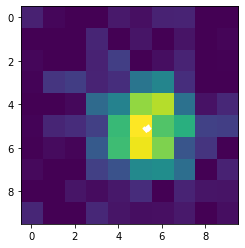

In [156]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(y)

plt.scatter(samps[:,0],samps[:,1],1,color='w')

(array([ 4.,  2., 12., 13., 20., 22., 13., 10.,  2.,  2.]),
 array([32.4014513 , 34.35585839, 36.31026549, 38.26467258, 40.21907968,
        42.17348677, 44.12789387, 46.08230096, 48.03670806, 49.99111515,
        51.94552225]),
 <a list of 10 Patch objects>)

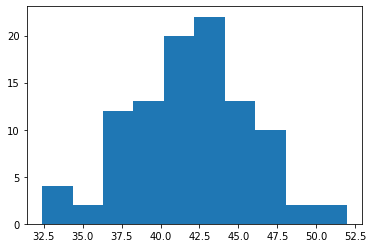

In [157]:
plt.hist(samps[:,2]**samps[:,3]*2*np.pi)

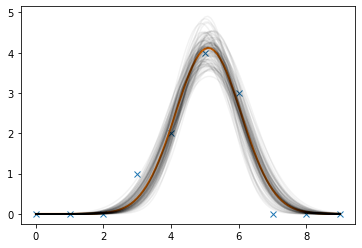

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

#each sample we plot the equivalent PSF for
#Here I also sum up the area, but look up the analytical expression for
#area of a Gaussian: we don't need to integrate numerically.
plt.plot(X,y,'x')
xtest = np.linspace(0,9,100)
plt.plot(xtest,[func(x,guess[0],guess[1],guess[2]) for x in xtest],lw=2)
a = []
for s in samps:
    plt.plot(xtest,[func(x,s[0],s[1],s[2]) for x in xtest],'-k',alpha=0.05)
    a.append(np.sum([func(x,s[0],s[1],s[2]) for x in xtest])*(xtest[1]-xtest[0]))
    #need really to do this analytically

(array([ 4.,  9., 18., 16., 19., 18.,  5.,  5.,  4.,  2.]),
 array([ 8.28142321,  8.68220762,  9.08299202,  9.48377642,  9.88456083,
        10.28534523, 10.68612963, 11.08691404, 11.48769844, 11.88848284,
        12.28926725]),
 <a list of 10 Patch objects>)

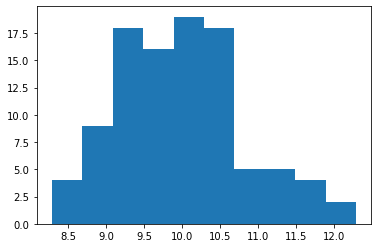

In [8]:
#here's the distribution of possible areas from the samples.
plt.hist(a)

In [9]:
# integrate over to get area for each.

#To do:
# - repeat but for a 2d dataset (instead of a 1d one)
# - for each channel
# - find the volume under each (for each channel) [for lots of samples]
# - use analytic solution to area
# - plot the (say) 95% CI boundary on the RGB triangle for each
# - compare to the expected modelled spectral
# - introduce 'background' to the model - i.e. the PSF + a constant